## K-Nearest-Neighbors

KNN falls in the supervised learning family of algorithms. Informally, this means that we are given a labelled dataset consiting of training observations (x,y) and would like to capture the relationship between x and y. More formally, our goal is to learn a function h:X→Y so that given an unseen observation x, h(x) can confidently predict the corresponding output y.

In this module we will explore the inner workings of KNN, choosing the optimal K values and using KNN from scikit-learn.

## Problem statement

### Dataset

The data set we’ll be using is the Iris Flower Dataset which was first introduced in 1936 by the famous statistician Ronald Fisher and consists of 50 observations from each of three species of Iris (Iris setosa, Iris virginica and Iris versicolor). Four features were measured from each sample: the length and the width of the sepals and petals.

**Source:** https://archive.ics.uci.edu/ml/datasets/Iris

**Train the KNN algorithm to be able to distinguish the species from one another given the measurements of the 4 features.**

## Question 1

#### Read the iris.csv file

In [23]:
# import 'Pandas' 
import pandas as pd 

# import 'Numpy' 
import numpy as np

# import subpackage of Matplotlib
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

# import 'Seaborn' 
import seaborn as sns

# to suppress warnings 
from warnings import filterwarnings
filterwarnings('ignore')

# display all columns of the dataframe
pd.options.display.max_columns = None

# display all rows of the dataframe
pd.options.display.max_rows = None
 
# to display the float values upto 6 decimal places     
pd.options.display.float_format = '{:.6f}'.format

# import train-test split 
from sklearn.model_selection import train_test_split

# import StandardScaler to perform scaling
from sklearn.preprocessing import StandardScaler 

# import various functions from sklearn 
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.naive_bayes import GaussianNB

# import the functions for visualizing the decision tree
import pydotplus
from IPython.display import Image  

import random

In [24]:
#Data setup
df = pd.read_csv('iris.csv', skiprows=0)
df.sample(10)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
64,65,5.600000,2.900000,3.600000,1.300000,Iris-versicolor
120,121,6.900000,3.200000,5.700000,2.300000,Iris-virginica
122,123,7.700000,2.800000,6.700000,2.000000,Iris-virginica
55,56,5.700000,2.800000,4.500000,1.300000,Iris-versicolor
136,137,6.300000,3.400000,5.600000,2.400000,Iris-virginica
30,31,4.800000,3.100000,1.600000,0.200000,Iris-setosa
97,98,6.200000,2.900000,4.300000,1.300000,Iris-versicolor
53,54,5.500000,2.300000,4.000000,1.300000,Iris-versicolor
78,79,6.000000,2.900000,4.500000,1.500000,Iris-versicolor
95,96,5.700000,3.000000,4.200000,1.200000,Iris-versicolor


## Data Pre-processing

## Question 2 - Estimating missing values

*Its not good to remove the records having missing values all the time. We may end up loosing some data points. So, we will have to see how to replace those missing values with some estimated values (median) *

In [25]:
Total = df.isnull().sum().sort_values(ascending=False) 

Percent = (df.isnull().sum()*100/df.isnull().count()).sort_values(ascending=False)   
missing_data = pd.concat([Total, Percent], axis = 1, keys = ['Total', 'Percentage of Missing Values'])

missing_data

,Total,Percentage of Missing Values
SepalWidthCm,2,1.315789
PetalLengthCm,2,1.315789
SepalLengthCm,1,0.657895
PetalWidthCm,1,0.657895
Id,0,0.000000
Species,0,0.000000


In [26]:
df.SepalLengthCm.fillna(df.SepalLengthCm.median(), inplace=True)
df.SepalWidthCm.fillna(df.SepalWidthCm.median(), inplace=True)
df.PetalLengthCm.fillna(df.PetalLengthCm.median(), inplace=True)
df.PetalWidthCm.fillna(df.PetalWidthCm.median(), inplace=True)

In [27]:
df.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

## Question 3 - Dealing with categorical data

Change all the classes to numericals (0to2).

In [32]:
df.iloc[:,5].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [33]:
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.100000,3.500000,1.400000,0.200000,Iris-setosa
1,2,4.900000,3.000000,1.400000,0.200000,Iris-setosa
2,3,4.700000,3.200000,1.300000,0.200000,Iris-setosa
3,4,4.600000,3.100000,1.500000,0.200000,Iris-setosa
4,5,5.000000,3.600000,1.400000,0.200000,Iris-setosa


In [34]:
from sklearn.preprocessing import LabelEncoder
class_label_encoder = LabelEncoder()

df.iloc[:,-1] = class_label_encoder.fit_transform(df.iloc[:,-1])

In [35]:
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.100000,3.500000,1.400000,0.200000,0
1,2,4.900000,3.000000,1.400000,0.200000,0
2,3,4.700000,3.200000,1.300000,0.200000,0
3,4,4.600000,3.100000,1.500000,0.200000,0
4,5,5.000000,3.600000,1.400000,0.200000,0


## Question 4

*Observe the association of each independent variable with target variable and drop variables from feature set having correlation in range -0.1 to 0.1 with target variable.*

In [36]:
df.corr()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
Id,1.000000,0.702734,-0.392693,0.872346,0.890676,0.942753
SepalLengthCm,0.702734,1.000000,-0.109369,0.871120,0.815986,0.775061
SepalWidthCm,-0.392693,-0.109369,1.000000,-0.420713,-0.356510,-0.417318
PetalLengthCm,0.872346,0.871120,-0.420713,1.000000,0.962043,0.944477
PetalWidthCm,0.890676,0.815986,-0.356510,0.962043,1.000000,0.952513
Species,0.942753,0.775061,-0.417318,0.944477,0.952513,1.000000


## Question 5

*Observe the independent variables variance and drop such variables having no variance or almost zero variance(variance < 0.1). They will be having almost no influence on the classification.*

In [37]:
df.var()

Id              1938.000000
SepalLengthCm      0.676645
SepalWidthCm       0.185552
PetalLengthCm      3.076516
PetalWidthCm       0.577141
Species            0.675322
dtype: float64

## Question 6

*Plot the scatter matrix for all the variables.*

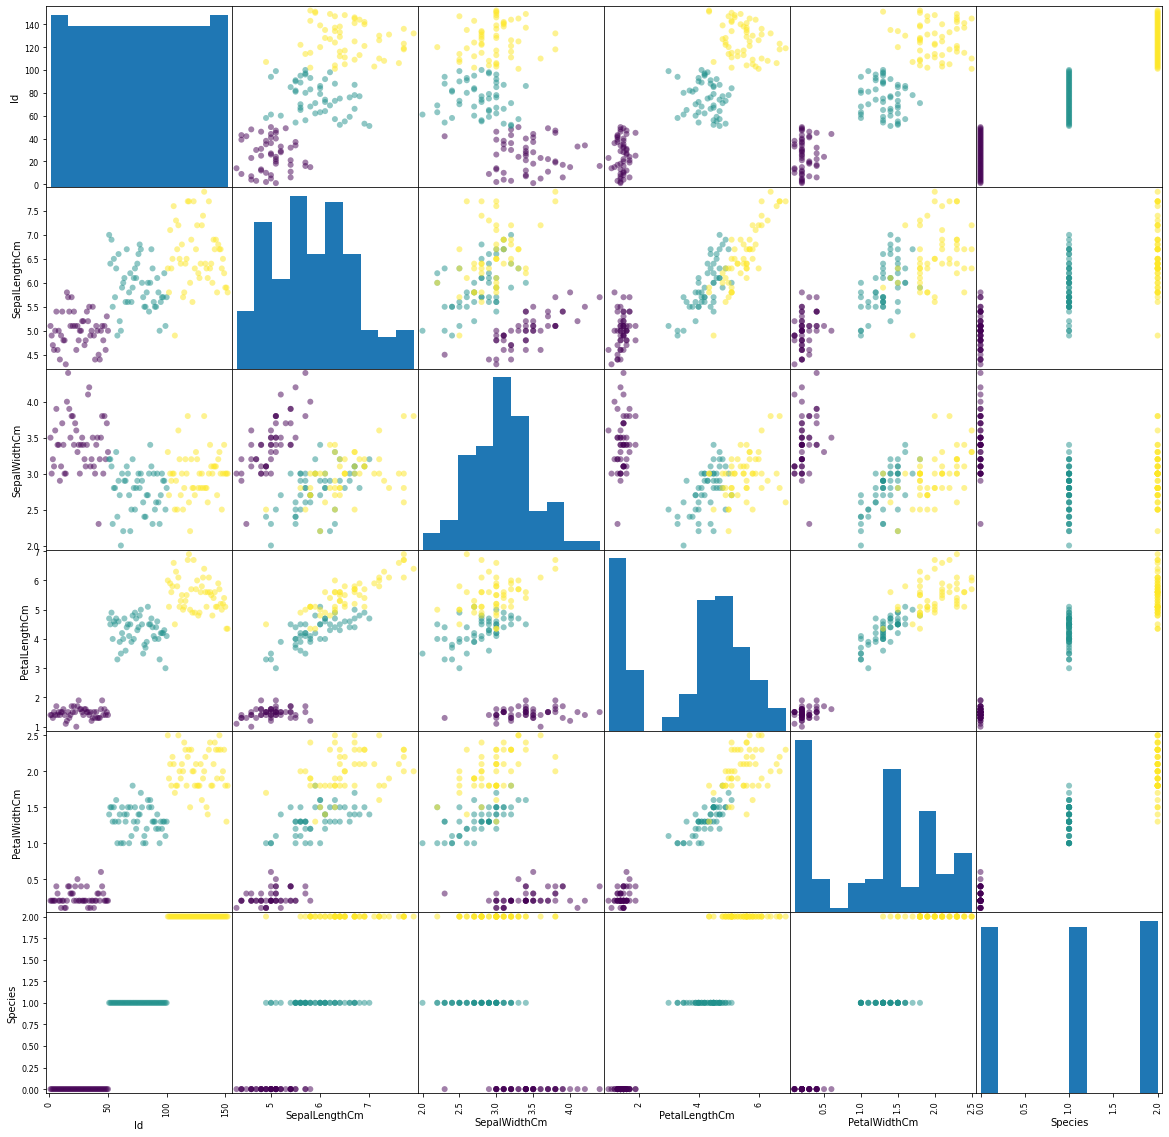

In [39]:
splt = pd.plotting.scatter_matrix(df, c=df.iloc[:,-1], figsize=(20, 20), marker='o')

## Split the dataset into training and test sets

## Question 7

*Split the dataset into training and test sets with 80-20 ratio.*

In [42]:
import numpy as np
from sklearn.model_selection import train_test_split

# Transform data into features and target
X = np.array(df.iloc[:, 1:5]) 
y = np.array(df['Species'])

# split into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=7)



In [43]:
print(X_train.shape)
print(y_train.shape)

(121, 4)
(121,)


In [44]:
print(X_test.shape)
print(y_test.shape)

(31, 4)
(31,)


## Question 8 - Model

*Build the model and train and test on training and test sets respectively using **scikit-learn**. Print the Accuracy of the model with different values of **k=3,5,9**.*

**Hint:** For accuracy you can check **accuracy_score()** in scikit-learn

In [46]:
# loading library
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# instantiate learning model (k = 3)
knn = KNeighborsClassifier(n_neighbors = 3)

# fitting the model
knn.fit(X_train, y_train)

# predict the response
y_pred = knn.predict(X_test)

# evaluate accuracy
print(accuracy_score(y_test, y_pred))

# instantiate learning model (k = 5)
knn = KNeighborsClassifier(n_neighbors=5)

# fitting the model
knn.fit(X_train, y_train)

# predict the response
y_pred = knn.predict(X_test)

# evaluate accuracy
print(accuracy_score(y_test, y_pred))

# instantiate learning model (k = 9)
knn = KNeighborsClassifier(n_neighbors=9)

# fitting the model
knn.fit(X_train, y_train)

# predict the response
y_pred = knn.predict(X_test)

# evaluate accuracy
print(accuracy_score(y_test, y_pred))

0.9354838709677419
0.967741935483871
0.9032258064516129


## Question 9 - Cross Validation

Run the KNN with no of neighbours to be 1,3,5..19 and *Find the **optimal number of neighbours** from the above list using the Mis classification error

Hint:

Misclassification error (MSE) = 1 - Test accuracy score. Calculated MSE for each model with neighbours = 1,3,5...19 and find the model with lowest MSE

In [47]:
# creating odd list of K for KNN
myList = list(range(1,20))

# subsetting just the odd ones
neighbors = list(filter(lambda x: x % 2 != 0, myList))


In [48]:

# empty list that will hold accuracy scores
ac_scores = []

# perform accuracy metrics for values from 1,3,5....19
for k in neighbors:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    # predict the response
    y_pred = knn.predict(X_test)
    # evaluate accuracy
    scores = accuracy_score(y_test, y_pred)
    ac_scores.append(scores)

# changing to misclassification error
MSE = [1 - x for x in ac_scores]

# determining best k
optimal_k = neighbors[MSE.index(min(MSE))]
print("The optimal number of neighbors is %d" % optimal_k)

The optimal number of neighbors is 5


## Question 10

*Plot misclassification error vs k (with k value on X-axis) using matplotlib.*

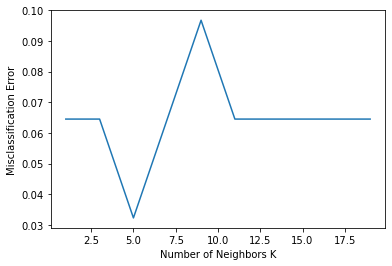

In [49]:
import matplotlib.pyplot as plt
# plot misclassification error vs k
plt.plot(neighbors, MSE)
plt.xlabel('Number of Neighbors K')
plt.ylabel('Misclassification Error')
plt.show()

# Naive Bayes

In [50]:
#Load all required library
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
from sklearn import datasets
from sklearn.decomposition import PCA
from sklearn.naive_bayes import GaussianNB, BernoulliNB, MultinomialNB

### Question 1
#### Import Iris.csv

In [51]:
# Load using input file
iris=pd.read_csv("iris.csv")
iris.head(5)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.100000,3.500000,1.400000,0.200000,Iris-setosa
1,2,4.900000,3.000000,1.400000,0.200000,Iris-setosa
2,3,4.700000,3.200000,1.300000,0.200000,Iris-setosa
3,4,4.600000,3.100000,1.500000,0.200000,Iris-setosa
4,5,5.000000,3.600000,1.400000,0.200000,Iris-setosa


In [52]:
# Check dimension of data
iris.shape

(152, 6)

In [53]:
#Check shape of data
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 152 entries, 0 to 151
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             152 non-null    int64  
 1   SepalLengthCm  151 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   151 non-null    float64
 5   Species        152 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [54]:
# check for missing values

In [55]:
iris.isna().sum()

Id               0
SepalLengthCm    1
SepalWidthCm     2
PetalLengthCm    2
PetalWidthCm     1
Species          0
dtype: int64

In [56]:
iris = iris.dropna()

In [57]:
iris.isna().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

### Question 2
#### Slice data set for Independent variables and dependent variables
#### Please note 'Species' is my dependent variables, name it y and independent set data as X

In [58]:
X=iris.iloc[:,:4].values
y=iris['Species'].values

In [59]:
#Check the dataset
print(y)
print(X)

['Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa'
 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa'
 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa'
 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa'
 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa'
 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa'
 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa'
 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa'
 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa'
 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa'
 'Iris-versicolor' 'Iris-versicolor' 'Iris-versicolor' 'Iris-versicolor'
 'Iris-versicolor' 'Iris-versicolor' 'Iris-versicolor' 'Iris-versicolor'
 'Iris-versicolor' 'Iris-versicolor' 'Iris-versicolor' 'Iris-versicolor'
 'Iris-versicolor' 'Iris-versicolor' 'Iris-versicolor' 'Iris-versicolor

## Question 3
#### Find the distribution of target variable (Class)
#### And, Plot the distribution of target variable using histogram

In [60]:
iris["Species"].value_counts()

Iris-virginica     50
Iris-setosa        50
Iris-versicolor    50
Name: Species, dtype: int64

### Plot the distribution of target variable using histogram

<AxesSubplot:>

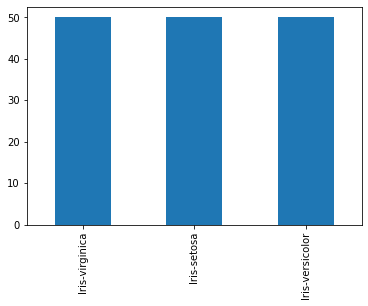

In [61]:
pd.value_counts(iris["Species"]).plot(kind="bar")

### Plot Scatter Matrix to understand the distribution of variables and give insights from it( 1 Marks)

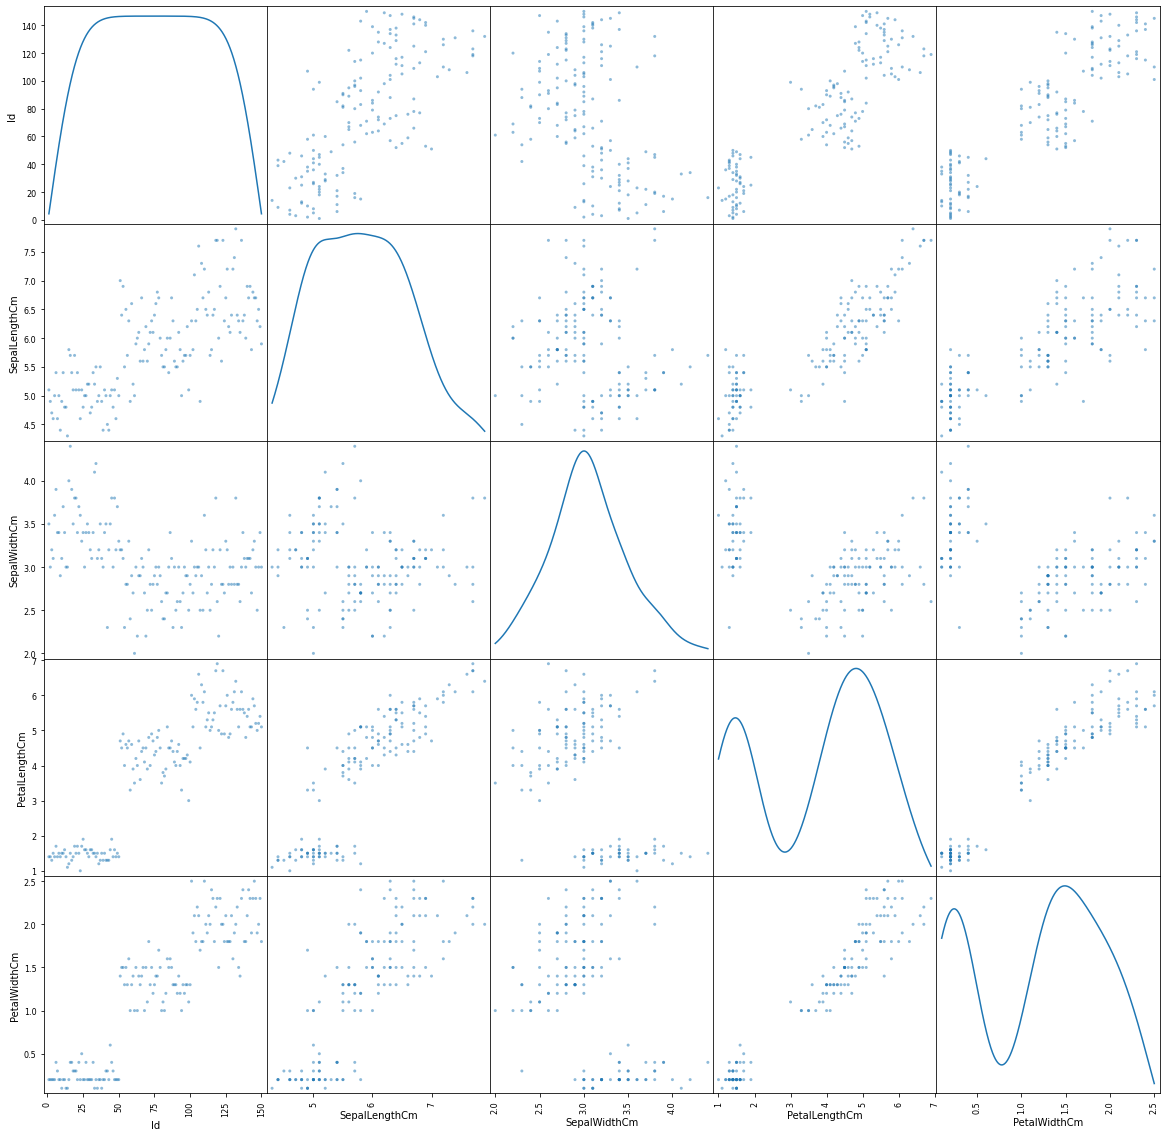

In [62]:
spd = pd.plotting.scatter_matrix(iris, figsize=(20,20), diagonal="kde")

### Question 3
#### Find Correlation among all variables and give your insights 

In [63]:
corr = iris.corr()
corr
#Please note, it's Require to remove correlated features because they are voted twice in the model and it can lead to over inflating importance.We will ignore it here

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
Id,1.000000,0.716676,-0.397729,0.882747,0.899759
SepalLengthCm,0.716676,1.000000,-0.109369,0.871754,0.817954
SepalWidthCm,-0.397729,-0.109369,1.000000,-0.420516,-0.356544
PetalLengthCm,0.882747,0.871754,-0.420516,1.000000,0.962757
PetalWidthCm,0.899759,0.817954,-0.356544,0.962757,1.000000


In [64]:
iris

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.100000,3.500000,1.400000,0.200000,Iris-setosa
1,2,4.900000,3.000000,1.400000,0.200000,Iris-setosa
2,3,4.700000,3.200000,1.300000,0.200000,Iris-setosa
3,4,4.600000,3.100000,1.500000,0.200000,Iris-setosa
4,5,5.000000,3.600000,1.400000,0.200000,Iris-setosa
5,6,5.400000,3.900000,1.700000,0.400000,Iris-setosa
6,7,4.600000,3.400000,1.400000,0.300000,Iris-setosa
7,8,5.000000,3.400000,1.500000,0.200000,Iris-setosa
8,9,4.400000,2.900000,1.400000,0.200000,Iris-setosa
9,10,4.900000,3.100000,1.500000,0.100000,Iris-setosa


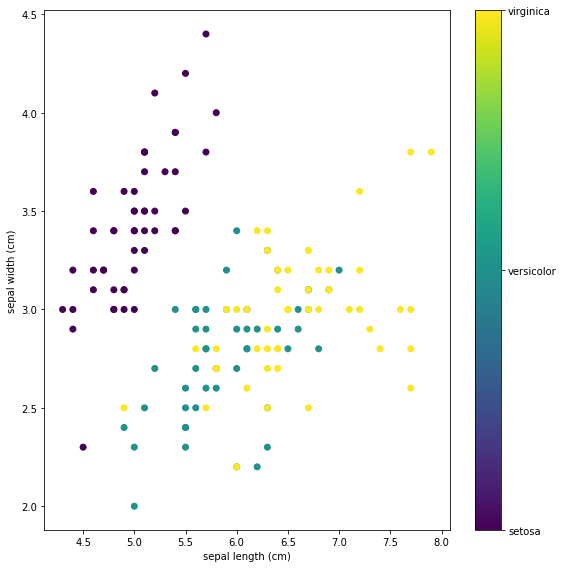

In [65]:
from sklearn.datasets import load_iris
iris = load_iris()

from matplotlib import pyplot as plt

# The indices of the features that we are plotting
x_index = 0
y_index = 1

# this formatter will label the colorbar with the correct target names
formatter = plt.FuncFormatter(lambda i, *args: iris.target_names[int(i)])

plt.figure(figsize=(8, 8))
plt.scatter(iris.data[:, x_index], iris.data[:, y_index], c=iris.target)
plt.colorbar(ticks=[0, 1, 2], format=formatter)
plt.xlabel(iris.feature_names[x_index])
plt.ylabel(iris.feature_names[y_index])

plt.tight_layout()
plt.show()

### Question 4
#### Split data in Training and Validation in 80:20

In [66]:
### SPLITTING INTO TRAINING AND TEST SETS
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20,random_state=22)

### Question 5
#### Do Feature Scaling 

In [67]:
### NORMALIZTION / FEATURE SCALING
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

### Question 6 
#### Train and Fit NaiveBayes Model

In [68]:
### WE WILL FIT THE THE CLASSIFIER TO THE TRAINING SET
naiveClassifier=GaussianNB()
naiveClassifier.fit(X_train,y_train)

GaussianNB()

In [69]:
y_pred = naiveClassifier.predict(X_test)

In [70]:
#Keeping the actual and predicted value side by side
y_compare = np.vstack((y_test,y_pred)).T
#Actual->LEFT
#predicted->RIGHT
#Number of values to be print
y_compare[:20,:]

array([['Iris-setosa', 'Iris-setosa'],
       ['Iris-virginica', 'Iris-virginica'],
       ['Iris-versicolor', 'Iris-versicolor'],
       ['Iris-virginica', 'Iris-virginica'],
       ['Iris-versicolor', 'Iris-versicolor'],
       ['Iris-versicolor', 'Iris-versicolor'],
       ['Iris-versicolor', 'Iris-versicolor'],
       ['Iris-virginica', 'Iris-virginica'],
       ['Iris-versicolor', 'Iris-versicolor'],
       ['Iris-setosa', 'Iris-setosa'],
       ['Iris-virginica', 'Iris-virginica'],
       ['Iris-versicolor', 'Iris-versicolor'],
       ['Iris-virginica', 'Iris-virginica'],
       ['Iris-virginica', 'Iris-virginica'],
       ['Iris-setosa', 'Iris-setosa'],
       ['Iris-virginica', 'Iris-virginica'],
       ['Iris-versicolor', 'Iris-versicolor'],
       ['Iris-versicolor', 'Iris-versicolor'],
       ['Iris-virginica', 'Iris-virginica'],
       ['Iris-versicolor', 'Iris-versicolor']], dtype=object)

### Question 7
#### Print Accuracy and Confusion Matrix and Conclude your findings

In [71]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[ 6  0  0]
 [ 0 10  0]
 [ 0  0 14]]


In [72]:
#finding accuracy from the confusion matrix.
a = cm.shape
correctPrediction = 0
falsePrediction = 0

for row in range(a[0]):
    for c in range(a[1]):
        if row == c:
            correctPrediction +=cm[row,c]
        else:
            falsePrediction += cm[row,c]
print('Correct predictions: ', correctPrediction)
print('False predictions', falsePrediction)
print ('\n\nAccuracy of the Naive Bayes Clasification is: ', correctPrediction/(cm.sum()))

Correct predictions:  30
False predictions 0


Accuracy of the Naive Bayes Clasification is:  1.0


In [73]:
from sklearn import metrics
print(metrics.classification_report(y_pred, y_test))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00         6
Iris-versicolor       1.00      1.00      1.00        10
 Iris-virginica       1.00      1.00      1.00        14

       accuracy                           1.00        30
      macro avg       1.00      1.00      1.00        30
   weighted avg       1.00      1.00      1.00        30



# SVM

In [74]:
#Import library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

This dataset describes the medical records for Pima Indians and whether or not each patient will have an onset of diabetes within ve years.

Fields description follow:

preg = Number of times pregnant

plas = Plasma glucose concentration a 2 hours in an oral glucose tolerance test

pres = Diastolic blood pressure (mm Hg)

skin = Triceps skin fold thickness (mm)

test = 2-Hour serum insulin (mu U/ml)

mass = Body mass index (weight in kg/(height in m)^2)

pedi = Diabetes pedigree function

age = Age (years)

class = Class variable (1:tested positive for diabetes, 0: tested negative for diabetes)

### Question 1
#### Read the input file 'Diabetes.csv' using Pandas and check it's column names(1 Marks)

In [75]:
diabetes = pd.read_csv('pima-indians-diabetes.csv')
print(diabetes.columns)

Index(['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class'], dtype='object')


In [76]:
# Eye ball the imported dataset
diabetes.head()

,preg,plas,pres,skin,test,mass,pedi,age,class
0,6,148,72,35,0,33.600000,0.627000,50,1
1,1,85,66,29,0,26.600000,0.351000,31,0
2,8,183,64,0,0,23.300000,0.672000,32,1
3,1,89,66,23,94,28.100000,0.167000,21,0
4,0,137,40,35,168,43.100000,2.288000,33,1


### Question 2
#### Check the dimensions of dataset

In [77]:
print("dimension of diabetes data: {}".format(diabetes.shape))
#The diabetes dataset consists of 768 data points, with 9 features

dimension of diabetes data: (768, 9)


### Question 3
#### Check distribution of dependent variable 'class' and plot it

In [78]:
print(diabetes.groupby('class').size())

class
0    500
1    268
dtype: int64


### Out of  768 data points, 500 are labeled as 0 and 268 as 1.
### Class 0 means No diabetes, outcome 1 means diabetes

<AxesSubplot:xlabel='class', ylabel='count'>

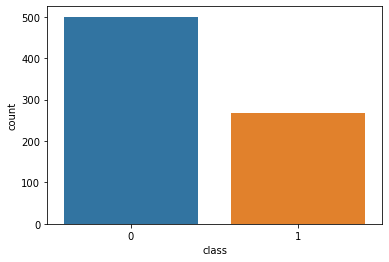

In [79]:
import seaborn as sns

sns.countplot(diabetes['class'],label="Count")

In [80]:
diabetes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   preg    768 non-null    int64  
 1   plas    768 non-null    int64  
 2   pres    768 non-null    int64  
 3   skin    768 non-null    int64  
 4   test    768 non-null    int64  
 5   mass    768 non-null    float64
 6   pedi    768 non-null    float64
 7   age     768 non-null    int64  
 8   class   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


### Question 4
#### Do correlation analysis and bivariate viualization with Insights

<AxesSubplot:title={'center':'Pearson Correlation of attributes'}>

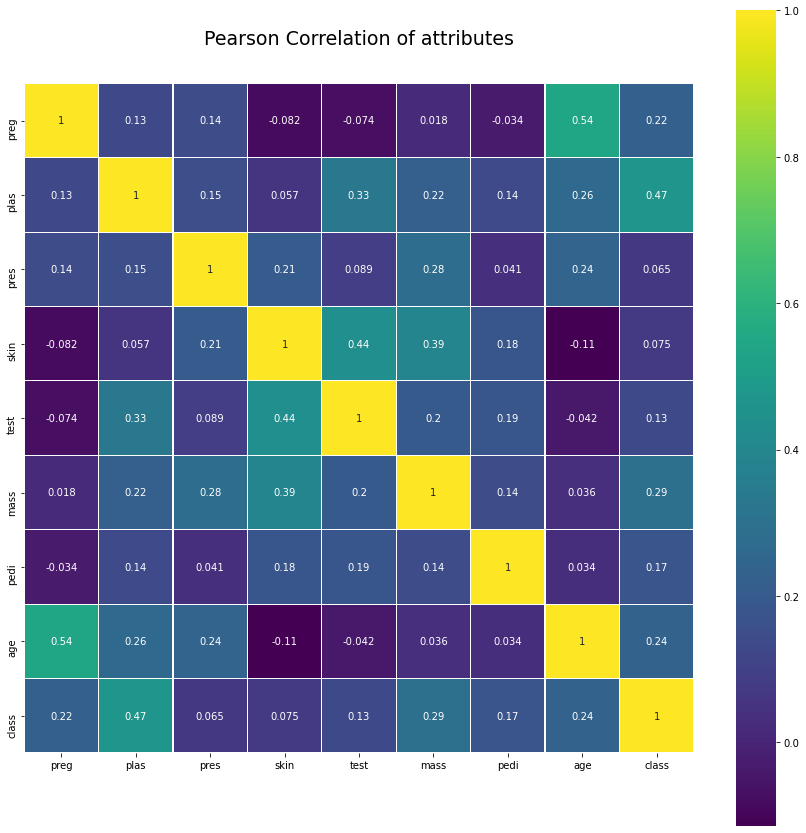

In [81]:
colormap = plt.cm.viridis # Color range to be used in heatmap
plt.figure(figsize=(15,15))
plt.title('Pearson Correlation of attributes', y=1.05, size=19)
sns.heatmap(diabetes.corr(),linewidths=0.1,vmax=1.0, 
            square=True, cmap=colormap, linecolor='white', annot=True)
#There is no strong correlation between any two variables.
#There is no strong correlation between any independent variable and class variable.

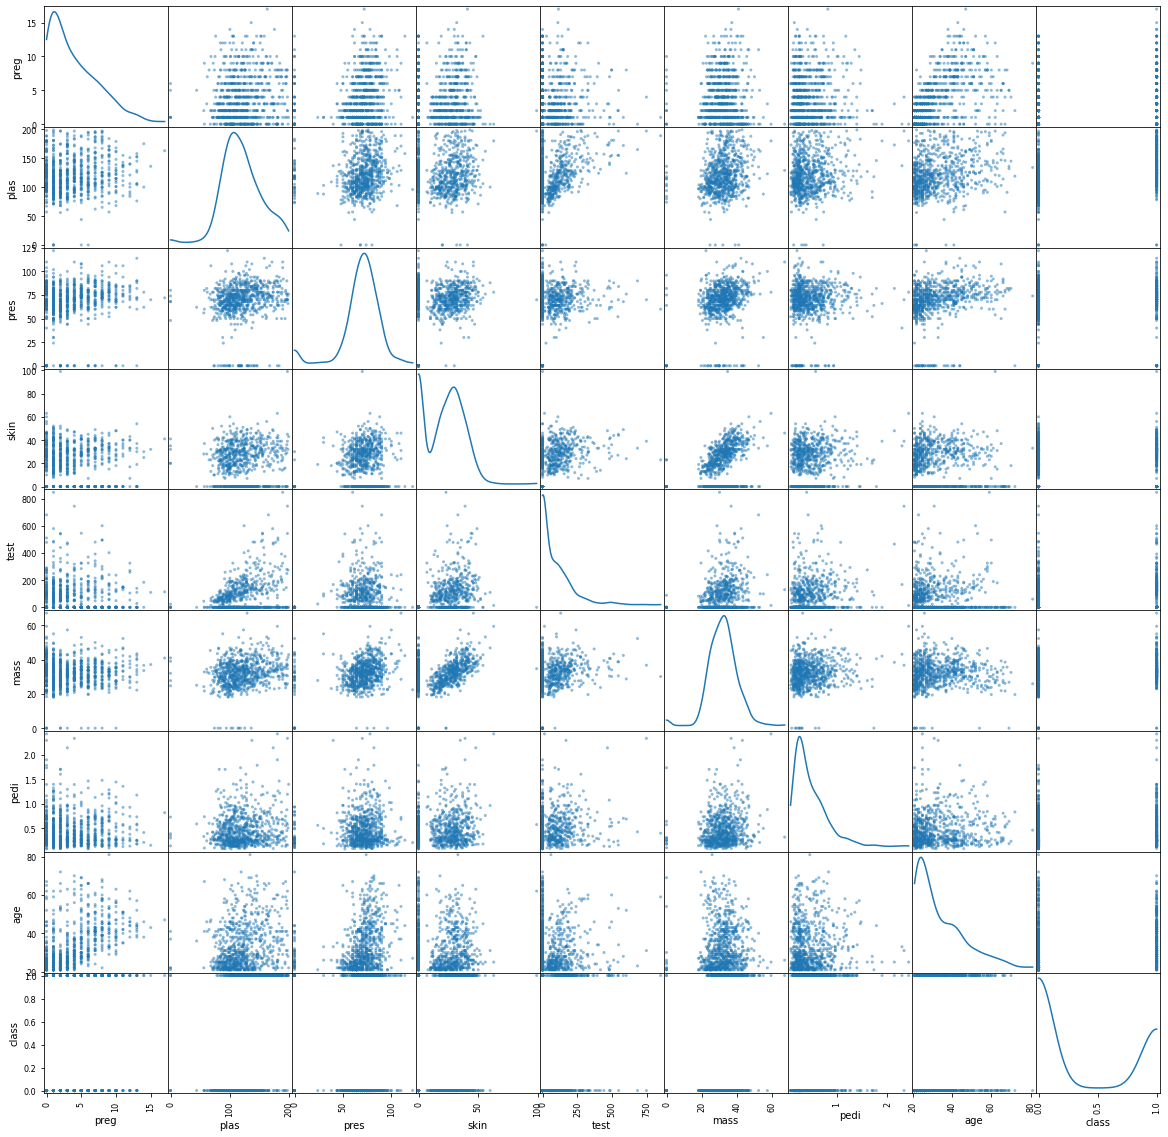

In [82]:
spd = pd.plotting.scatter_matrix(diabetes, figsize=(20,20), diagonal="kde")

### Question 5
#### Do train and test split with stratify sampling on Outcome variable to maintain the distribution of dependent variable

In [83]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(diabetes.loc[:, diabetes.columns != 'class'], diabetes['class'], stratify=diabetes['class'], random_state=11)

In [84]:
X_train.shape

(576, 8)

### Question 6
#### Train Support Vector Machine Model

In [85]:
from sklearn.svm import SVC

svc = SVC()
svc.fit(X_train, y_train)

print("Accuracy on training set: {:.2f}".format(svc.score(X_train, y_train)))
print("Accuracy on test set: {:.2f}".format(svc.score(X_test, y_test)))

Accuracy on training set: 0.77
Accuracy on test set: 0.76


In [86]:
#The model overfits substantially with a perfect score on the training set and only 65% accuracy on the test set.

#SVM requires all the features to be on a similar scale. We will need to rescale our data that all the features are approximately on the same scale and than see the performance

### Question 7
#### Scale the data points using MinMaxScaler

In [87]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_test)

### Question 8
#### Fit SVM Model on scaled data and give your observation

In [88]:
svc = SVC()
svc.fit(X_train_scaled, y_train)

print("Accuracy on training set: {:.2f}".format(svc.score(X_train_scaled, y_train)))
print("Accuracy on test set: {:.2f}".format(svc.score(X_test_scaled, y_test)))

Accuracy on training set: 0.80
Accuracy on test set: 0.78


### Question 9
#### Try improving the model accuracy using C=1000

In [89]:
svc = SVC(C=1000)
svc.fit(X_train_scaled, y_train)

print("Accuracy on training set: {:.3f}".format(
    svc.score(X_train_scaled, y_train)))
print("Accuracy on test set: {:.3f}".format(svc.score(X_test_scaled, y_test)))

Accuracy on training set: 0.950
Accuracy on test set: 0.703
